In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler 

# Setting to make numbers easier to read on display 
pd.options.display.float_format = '{:20.3f}'.format 

# Show all columns on output 
pd.set_option('display.max_columns', 999)

##### Additional Variables Information
- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

- Description: Product (item) name. Nominal. 

- Quantity: The quantities of each product (item) per transaction. Numeric.	

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 

- Country: Country name. Nominal. The name of the country where a customer resides.

### Data Exploration 

In [56]:
# Read the Excel file into a Pandas DataFrame.
# The file path is specified, and sheet_name=0 indicates the first sheet is loaded.
df = pd.read_excel("C:\\Users\\marin\\Jupyter Notebooks\\Retail Analysis\\online_retail_II.xlsx", sheet_name = 0)

# Display the first 10 rows of the DataFrame.
# This is useful for a quick look at the data structure and content.
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.650,13085.000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.950,13085.000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.550,13085.000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.750,13085.000,United Kingdom


In [57]:
# Provide a concise summary of the DataFrame.
# It includes data types, non-null values, and memory usage, which helps in understanding the dataset's structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [58]:
# Check for missing values 
# Calculate and display the number of missing values for each column.
# This is crucial for identifying data completeness issues that may require cleaning.
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [59]:
# Check columns data types 
# Display the data type of each column in the DataFrame.
# Knowing the data type is important for performing the correct data manipulations and analyses.
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [60]:
# Descriptive Statistics for numerical variables 
# Generate descriptive statistics for all numerical columns.
# This includes measures like mean, standard deviation, min, max, and quartiles, providing insights into the distribution of the data.
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000,525461,525461.000,417534.000
mean,10.338,2010-06-28 11:37:36.845017856,4.689,15360.645
min,-9600.000,2009-12-01 07:45:00,-53594.360,12346.000
25%,1.000,2010-03-21 12:20:00,1.250,13983.000
50%,3.000,2010-07-06 09:51:00,2.100,15311.000
75%,10.000,2010-10-15 12:45:00,4.210,16799.000
max,19152.000,2010-12-09 20:01:00,25111.090,18287.000
std,107.424,NaN,146.127,1680.811


From Descriptive Statistics For Numerical Columns we see:
- Quantity column has min negative number
- Price column has min negative number 

In [61]:
# Descriptive Statistics for categorical variables
# Generate descriptive statistics for all object (categorical) columns.
# This includes counts, number of unique values, the most frequent value, and its frequency.
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [62]:
# Inspect missing Customer ID values 
# Display the first 10 rows where 'Customer ID' is missing.
# This helps in understanding the nature or pattern of missing customer data.
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.000,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.000,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.000,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.000,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.550,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.850,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.950,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.250,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.950,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.650,NaN,United Kingdom


In [63]:
# Inspect rows with negative quantities 
# Filter the DataFrame to show rows where 'Quantity' or 'Price' is less than 0.
# Display the first 10 of these rows to investigate potentially erroneous or return-related data.
df[df['Quantity'] < 0 ].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.250,16321.000,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.250,16321.000,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.850,16321.000,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.250,17592.000,United Kingdom


Importan is that whenever an Invoice has a C prefix it means that the order has been Cancelled

In [10]:
df['Invoice'] = df['Invoice'].astype(str)
df[df['Invoice'].str.match("^\\d{6}$") == False] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.100,12605.000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.500,15329.000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.950,15329.000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.750,15329.000,United Kingdom


In [11]:
# Check if prefix C is the only character present in Invoice column 
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
# Inspect Invoices with prefix A 
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


In [13]:
df['StockCode'] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [14]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.190,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.960,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.390,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.350,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.390,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.940,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.320,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.680,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.940,NaN,United Kingdom


## Notes
#### Stock Code

StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+

Also contains other values: | Code | Description | Action | |---------------------|------------------------------------------------------------------------|-------------------------| | - - 
- DCGS | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering | |
- D | Looks valid, represents discount values | Exclude from clustering | |
- DOT | Looks valid, represents postage charges | Exclude from clustering | |
- M or m | Looks valid, represents manual transactions | Exclude from clustering | |
- C2 | Carriage transaction - not sure what this means | Exclude from clustering | |
- C3 | Not sure, only 1 transaction | Exclude | |
- BANK CHARGES or B | Bank charges | Exclude from clustering | |
- S | Samples sent to customer | Exclude from clustering | |
- TESTXXX | Testing data, not valid | Exclude from clustering | |
- gift__XXX | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude | |
- PADS | Looks like a legit stock code for padding | Include | |
- SP1002 | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now| |
- AMAZONFEE | Looks like fees for Amazon shipping or something | Exclude for now | |
- ADJUSTX | Looks like manual account adjustments by admins | Exclude for now |

### Data Cleaning

In [15]:
cleaned_df = df.copy()

In [16]:
# Clean Invoice column
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom


In [17]:
# Clean StockCode column
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) |
    (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.950,17530.000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.750,17530.000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.750,17530.000,United Kingdom


In [64]:
# Drop rows with missing 'Customer ID' values
# The inplace=True argument modifies the DataFrame directly.
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

C:\Users\marin\AppData\Local\Temp\ipykernel_11720\1428683808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace=True)


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000,406337,406337.000,406337.000
mean,13.619,2010-07-01 10:11:06.543288320,2.991,15373.633
min,1.000,2009-12-01 07:45:00,0.000,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14004.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,97.001,NaN,4.286,1677.366


In [20]:
# Inspect rows-columns with 0.00 Price
cleaned_df[cleaned_df['Price'] == 0]

# Remove those rows 
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.01]
cleaned_df.describe()
cleaned_df['Price'].min()

np.float64(0.03)

In [21]:
# Check how many records in percentage we "lost" during Cleaning Step
print("Kept: ", round(len(cleaned_df)/len(df) * 100, 2), "% of Data")
print("Dropped: ",round(abs(len(cleaned_df)/len(df) * 100 - 100), 2), "% of Data")

Kept:  77.32 % of Data
Dropped:  22.68 % of Data


### Feature Engineering

In [65]:
# Create 'SalesLineTotal' column
# Calculate 'SalesLineTotal' by multiplying 'Quantity' and 'Price'.
# This represents the total revenue from each transaction.
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df['SalesLineTotal']

C:\Users\marin\AppData\Local\Temp\ipykernel_11720\1080745252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


0                      83.400
1                      81.000
2                      81.000
3                     100.800
4                      30.000
                 ...         
525456                  5.900
525457                  3.750
525458                  3.750
525459                  7.500
525460                  3.900
Name: SalesLineTotal, Length: 406295, dtype: float64

In [23]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
.agg(
    MonetaryValue=("SalesLineTotal", "sum"),
    Frequency=("Invoice", "nunique"),
    LastInvoiceDate=("InvoiceDate", "max")
)
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.000,169.360,2,2010-06-28 13:53:00
1,12347.000,1323.320,2,2010-12-07 14:57:00
2,12348.000,221.160,1,2010-09-27 14:59:00
3,12349.000,2221.140,2,2010-10-28 08:23:00
4,12351.000,300.930,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.000,641.770,6,2010-11-22 15:30:00
4281,18284.000,411.680,1,2010-10-04 11:33:00
4282,18285.000,377.000,1,2010-02-17 10:24:00
4283,18286.000,1246.430,2,2010-08-20 11:57:00


In [24]:
# Calculate Recency
# Find the last transaction date for each customer
# Determine the most recent date in the dataset to calculate recency.
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [66]:
# Use this date to base recency off
# Calculate the number of days since each customer's last purchase.
# Subtract the last purchase date from the latest date in the dataset.
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.000,169.360,2,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,221.160,1,2010-09-27 14:59:00,73
3,12349.000,2221.140,2,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.000,641.770,6,2010-11-22 15:30:00,17
4281,18284.000,411.680,1,2010-10-04 11:33:00,66
4282,18285.000,377.000,1,2010-02-17 10:24:00,295
4283,18286.000,1246.430,2,2010-08-20 11:57:00,111


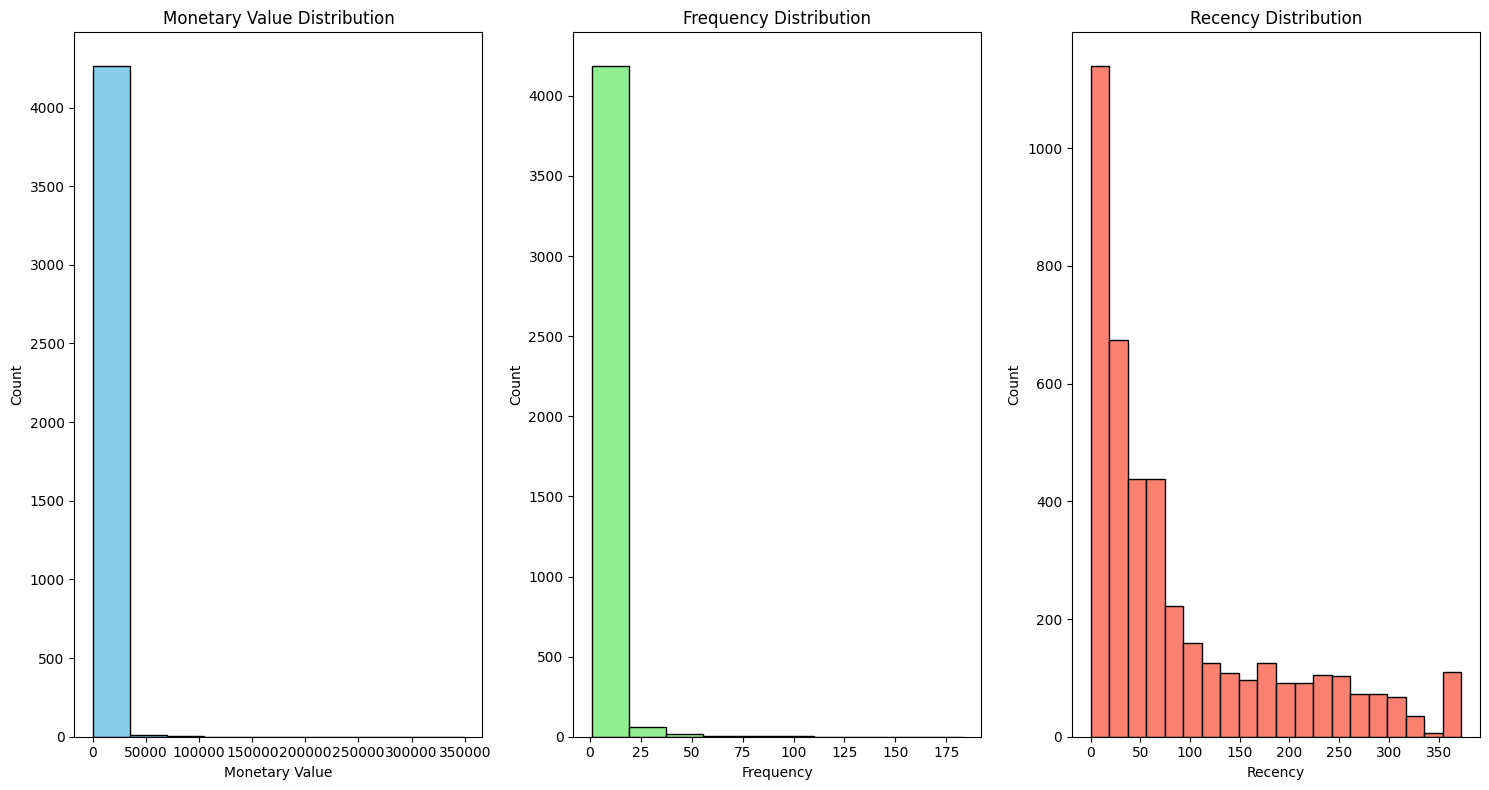

In [26]:
# Check the distributions of variables to check for outliers
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

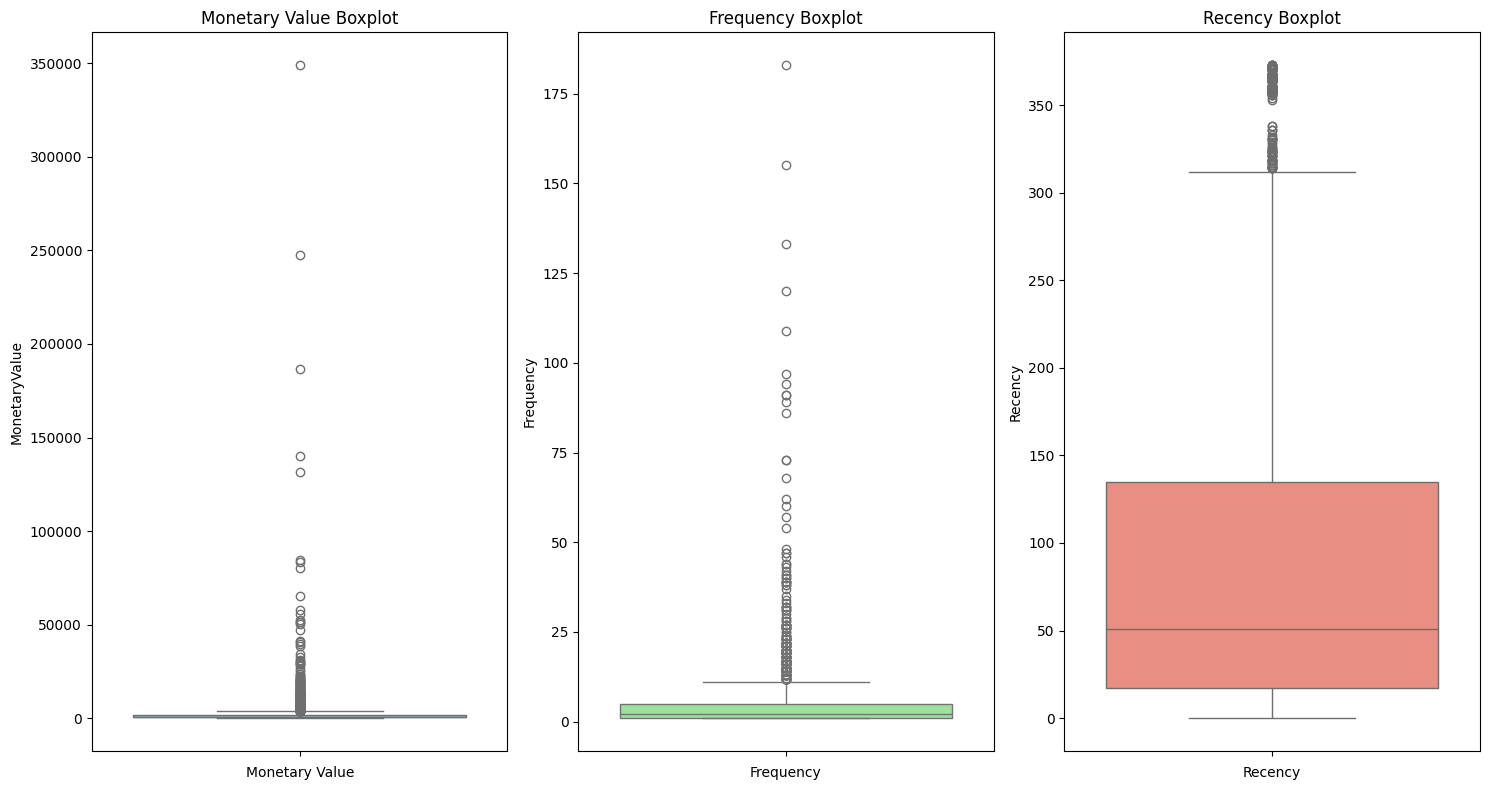

In [27]:
# Check the distributions of variables to check for outliers
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

After inspecting and evaluating the outliers and the distributions we come up to the decision that in KMeans Cluster
Model we won't use the outliers but we won't delete them either
We will seperate the outliers and use them for another analysis

In [28]:
# Monetary Value Interquantile Range
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1 

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000,423.000,423.000,423,423.000
mean,15103.040,12188.102,17.168,2010-11-09 12:26:02.978723328,30.035
min,12357.000,3802.040,1.000,2009-12-10 18:03:00,0.000
25%,13622.000,4605.940,8.000,2010-11-08 13:17:30,3.000
50%,14961.000,6191.320,12.000,2010-11-26 12:19:00,13.000
75%,16692.000,10273.235,18.000,2010-12-06 10:34:30,31.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,364.000
std,1728.661,25830.851,19.730,NaN,51.541


In [29]:
# Frequency Interquantile Range
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1 

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000,279.000,279.000,279,279.000
mean,15352.656,14409.715,23.810,2010-11-23 11:06:20.645161216,16.090
min,12437.000,1094.390,12.000,2010-05-12 16:51:00,0.000
25%,13800.000,4331.560,13.000,2010-11-20 13:14:30,2.000
50%,15465.000,6615.770,17.000,2010-12-02 10:46:00,7.000
75%,16828.500,11692.405,23.000,2010-12-07 11:08:30,19.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,211.000
std,1748.430,31381.737,21.933,NaN,26.589


In [30]:
# Recency Interquantile Range
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)
R_IQR = R_Q3 - R_Q1 

recency_outliers_df = aggregated_df[(aggregated_df['Recency'] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_df['Recency'] < (R_Q1 - 1.5 * R_IQR))].copy()
recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000,167.000,167.000,167,167.000
mean,15429.030,418.319,1.251,2009-12-23 13:52:27.664670720,350.970
min,12439.000,2.950,1.000,2009-12-01 10:49:00,314.000
25%,14115.500,147.350,1.000,2009-12-07 13:03:00,328.500
50%,15413.000,231.900,1.000,2009-12-14 15:07:00,360.000
75%,16812.000,356.175,1.000,2010-01-14 23:56:00,367.000
max,18201.000,9471.500,7.000,2010-01-29 14:22:00,373.000
std,1629.838,950.151,0.797,NaN,20.513


In [31]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000,3809.000,3809.000,3809,3809.000
mean,15376.483,885.502,2.863,2010-09-03 11:16:46.516146176,97.082
min,12346.000,1.550,1.000,2009-12-01 10:49:00,0.000
25%,13912.000,279.910,1.000,2010-07-08 14:48:00,22.000
50%,15389.000,588.050,2.000,2010-10-12 16:25:00,58.000
75%,16854.000,1269.050,4.000,2010-11-17 13:14:00,154.000
max,18287.000,3788.210,11.000,2010-12-09 20:01:00,373.000
std,1693.200,817.672,2.244,NaN,98.111


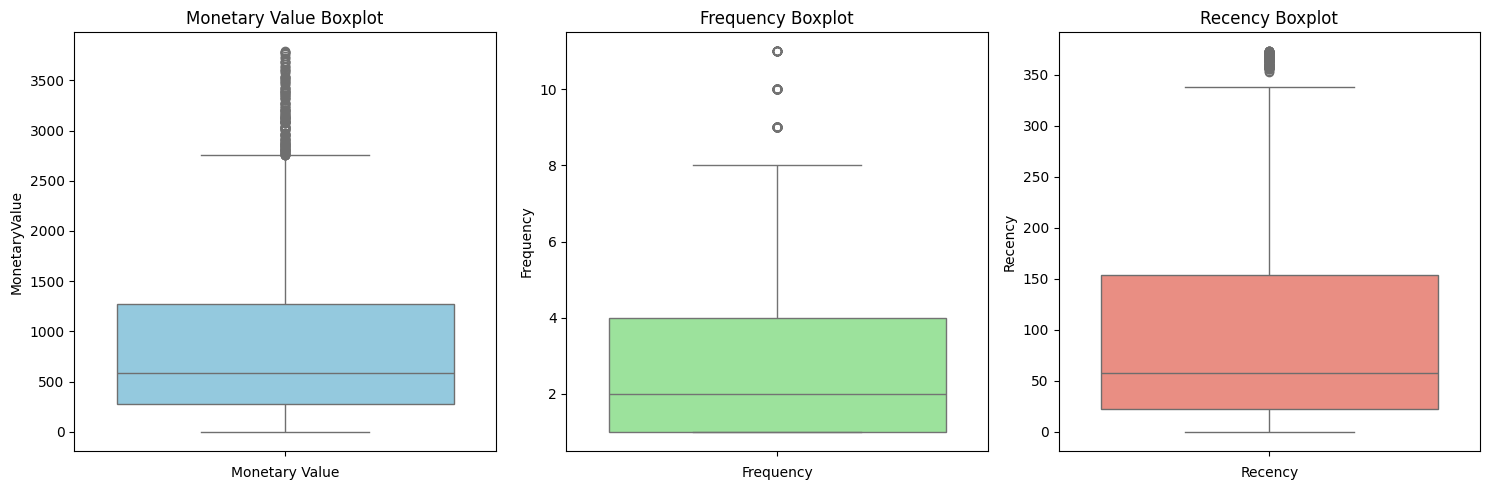

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

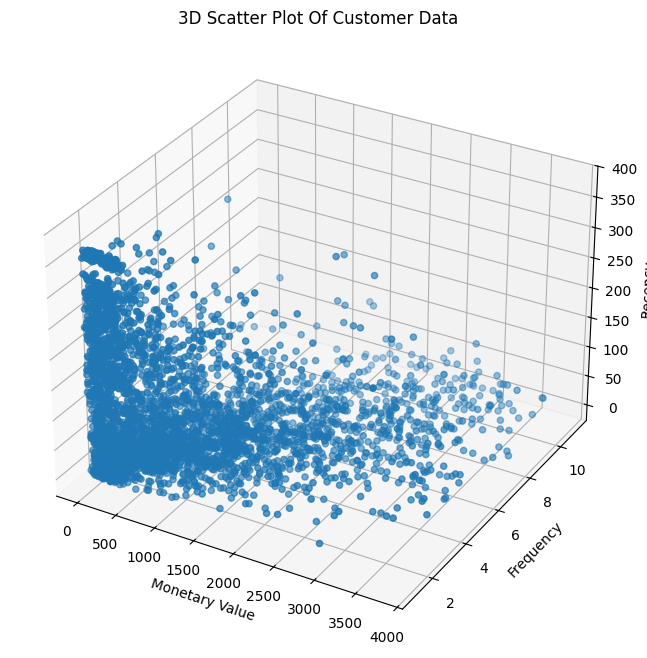

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title("3D Scatter Plot Of Customer Data")
plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

Formula:  z = (x-μ)/σ        

Where:
- z is the standardized value,
- x is the original value,
- μ is the mean of the feature,
- σ is the standard deviation of the feature

In [67]:
# Initialize the Scaler
# Create a StandardScaler object.
# This scaler will standardize the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit the scaler to the data and then transform the data.
# This scales the features to have a mean of 0 and a standard deviation of 1.
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.53551441, -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488782,  0.50659348, -0.81634357]])

In [68]:
# Convert the scaled data, which is a numpy array, back into a DataFrame.
# The column names are preserved.
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.876,-0.385,0.682
1,0.536,-0.385,-0.969
2,-0.813,-0.831,-0.245
3,1.634,-0.385,-0.561
4,-0.715,-0.831,-0.888
...,...,...,...
4280,-0.298,1.398,-0.816
4281,-0.580,-0.831,-0.317
4282,-0.622,-0.831,2.018
4283,0.441,-0.385,0.142


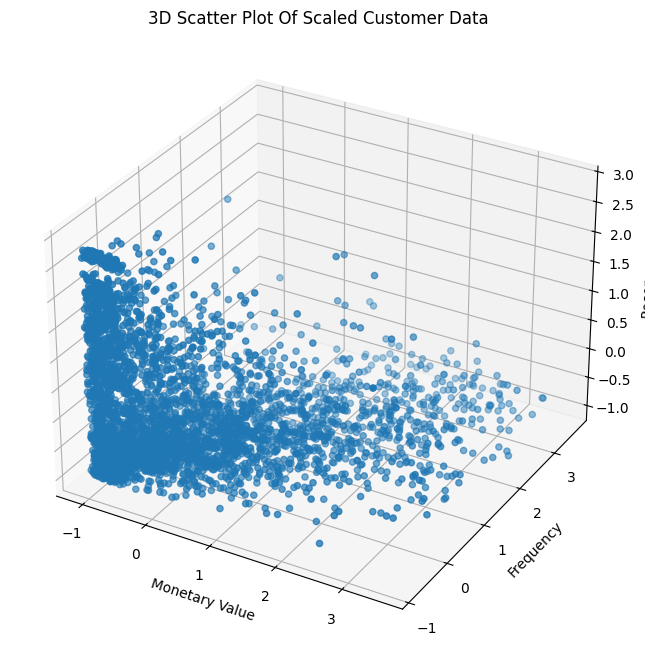

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title("3D Scatter Plot Of Scaled Customer Data")
plt.show()

### KMeans Clustering

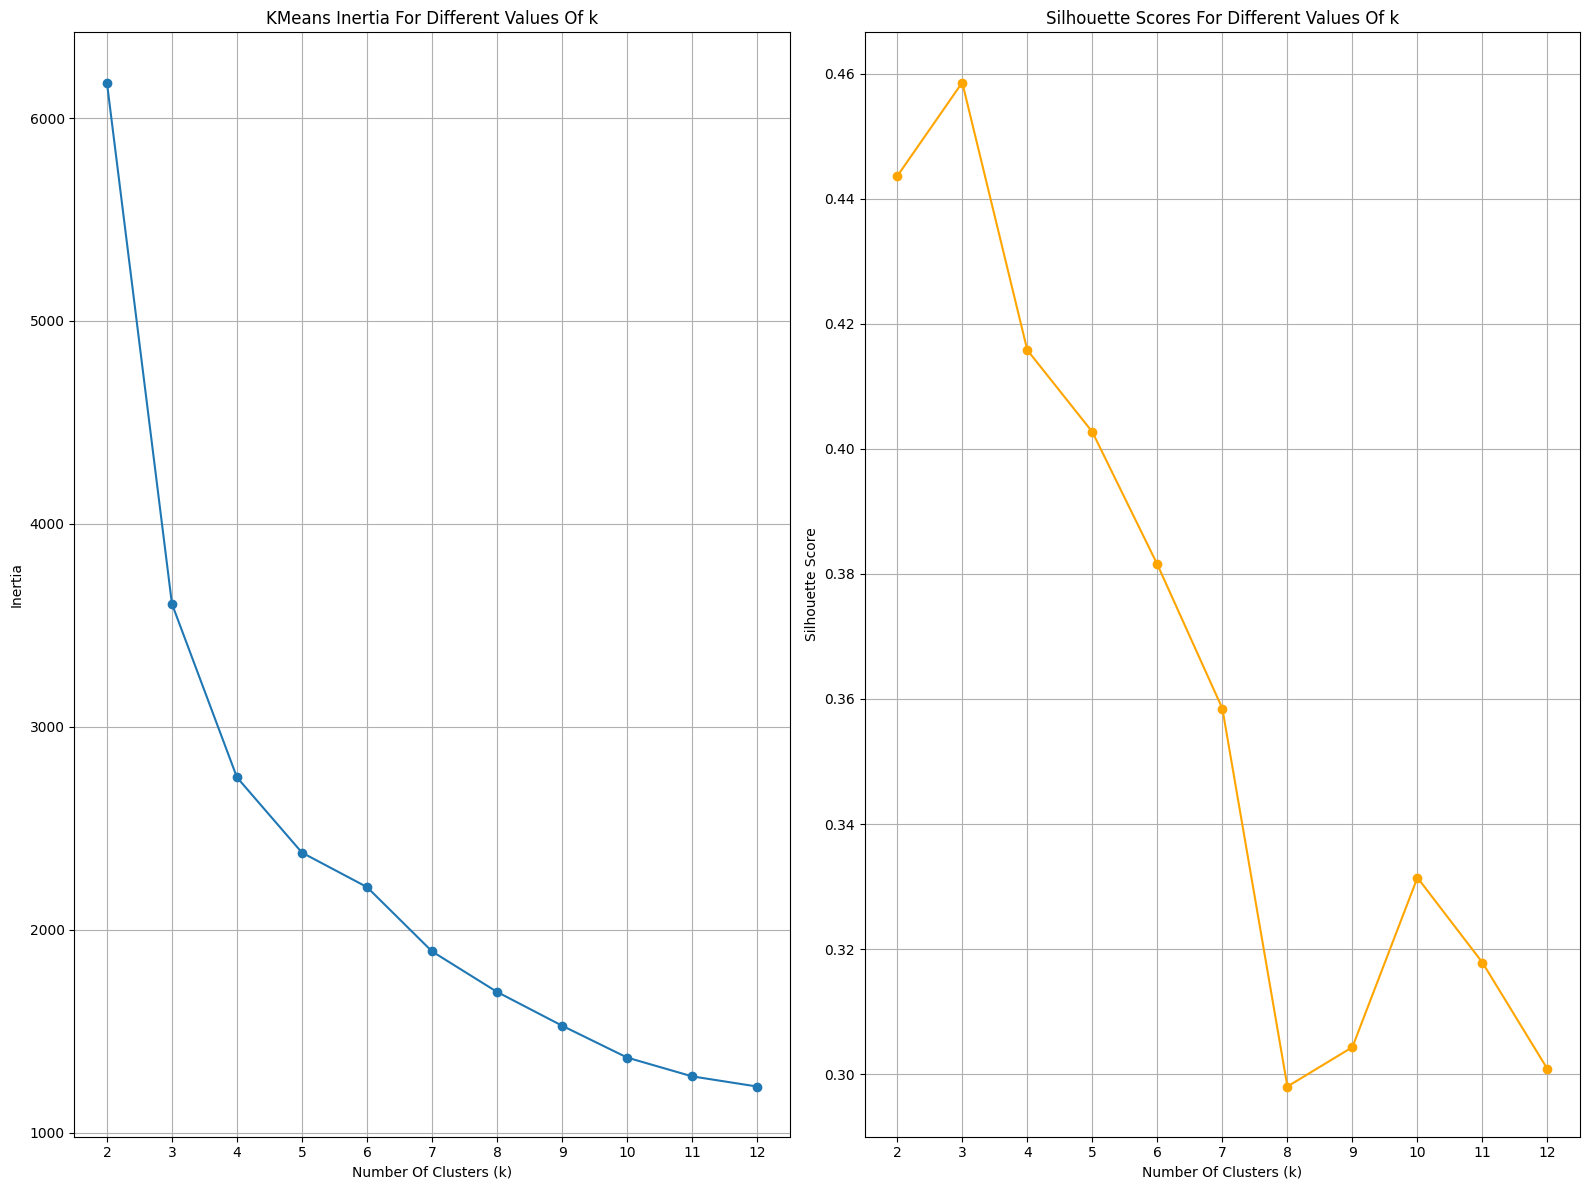

In [69]:
max_k = 12 

inertia = []

silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:
    # For each number, initialize a KMeans model.
    # n_clusters is the number of clusters, init is the initialization method,
    # max_iter is the maximum number of iterations, n_init is the number of initializations,
    # and random_state ensures reproducibility.
    kmeans = KMeans(n_clusters= k, random_state=42, max_iter=1000)

    # Fit the KMeans model to the scaled data and predict the cluster labels.
    cluster_labels = kmeans.fit_predict(scaled_data_df)

    # Calculate the average silhouette score for the current clustering.
    # The silhouette score measures how similar an object is to its own cluster compared to other clusters.
    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)
    # The inertia_ is the sum of squared distances of samples to their closest cluster center.
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia For Different Values Of k")
plt.xlabel("Number Of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores For Different Values Of k")
plt.xlabel("Number Of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()
# The elbow point of this plot helps in determining the optimal number of clusters.

#### Silhouette Score 

Formula:         s(i) = (b(i) - a(i)) / max(a(i), b(i))

Where:
- s(i) is the silhouette score for a single sample i,
- a(i) is the average distance between i and all other points in the same cluster,
- b(i) is the minimum average distance between i and all points
in the nearest cluster to which i does not belong.

The silhouette score ranges between [-1,1], a higher value indicates more distinct clusters.

In [41]:
# Initialize a KMeans model with 4 clusters.
# This number was chosen based on the elbow method and silhouette analysis.
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [42]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

C:\Users\marin\AppData\Local\Temp\ipykernel_11720\395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.000,641.770,6,2010-11-22 15:30:00,17,0
4281,18284.000,411.680,1,2010-10-04 11:33:00,66,2
4282,18285.000,377.000,1,2010-02-17 10:24:00,295,1
4283,18286.000,1246.430,2,2010-08-20 11:57:00,111,0


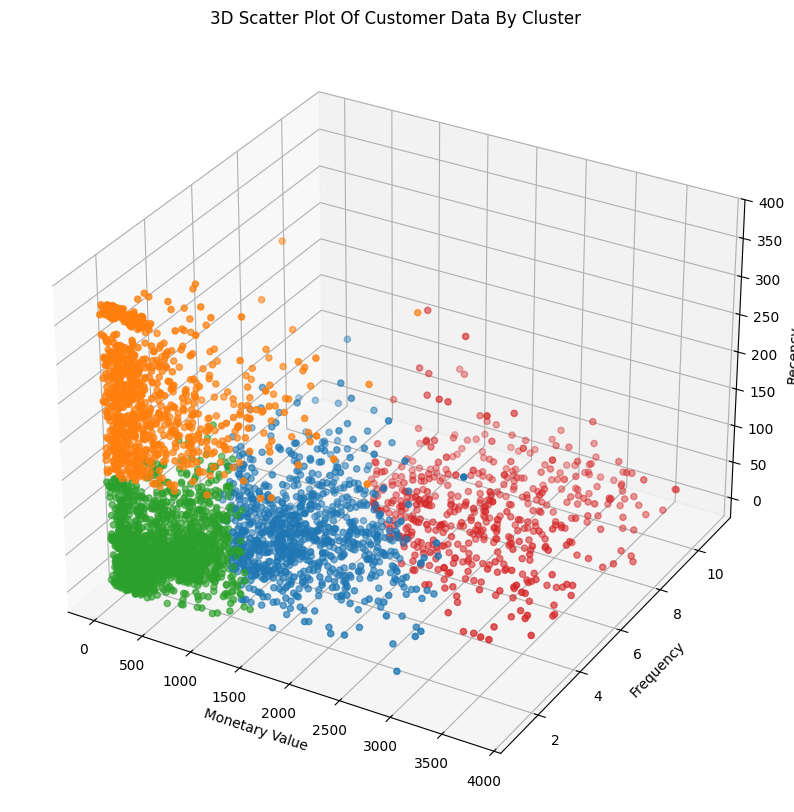

In [43]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot Of Customer Data By Cluster')

plt.show()

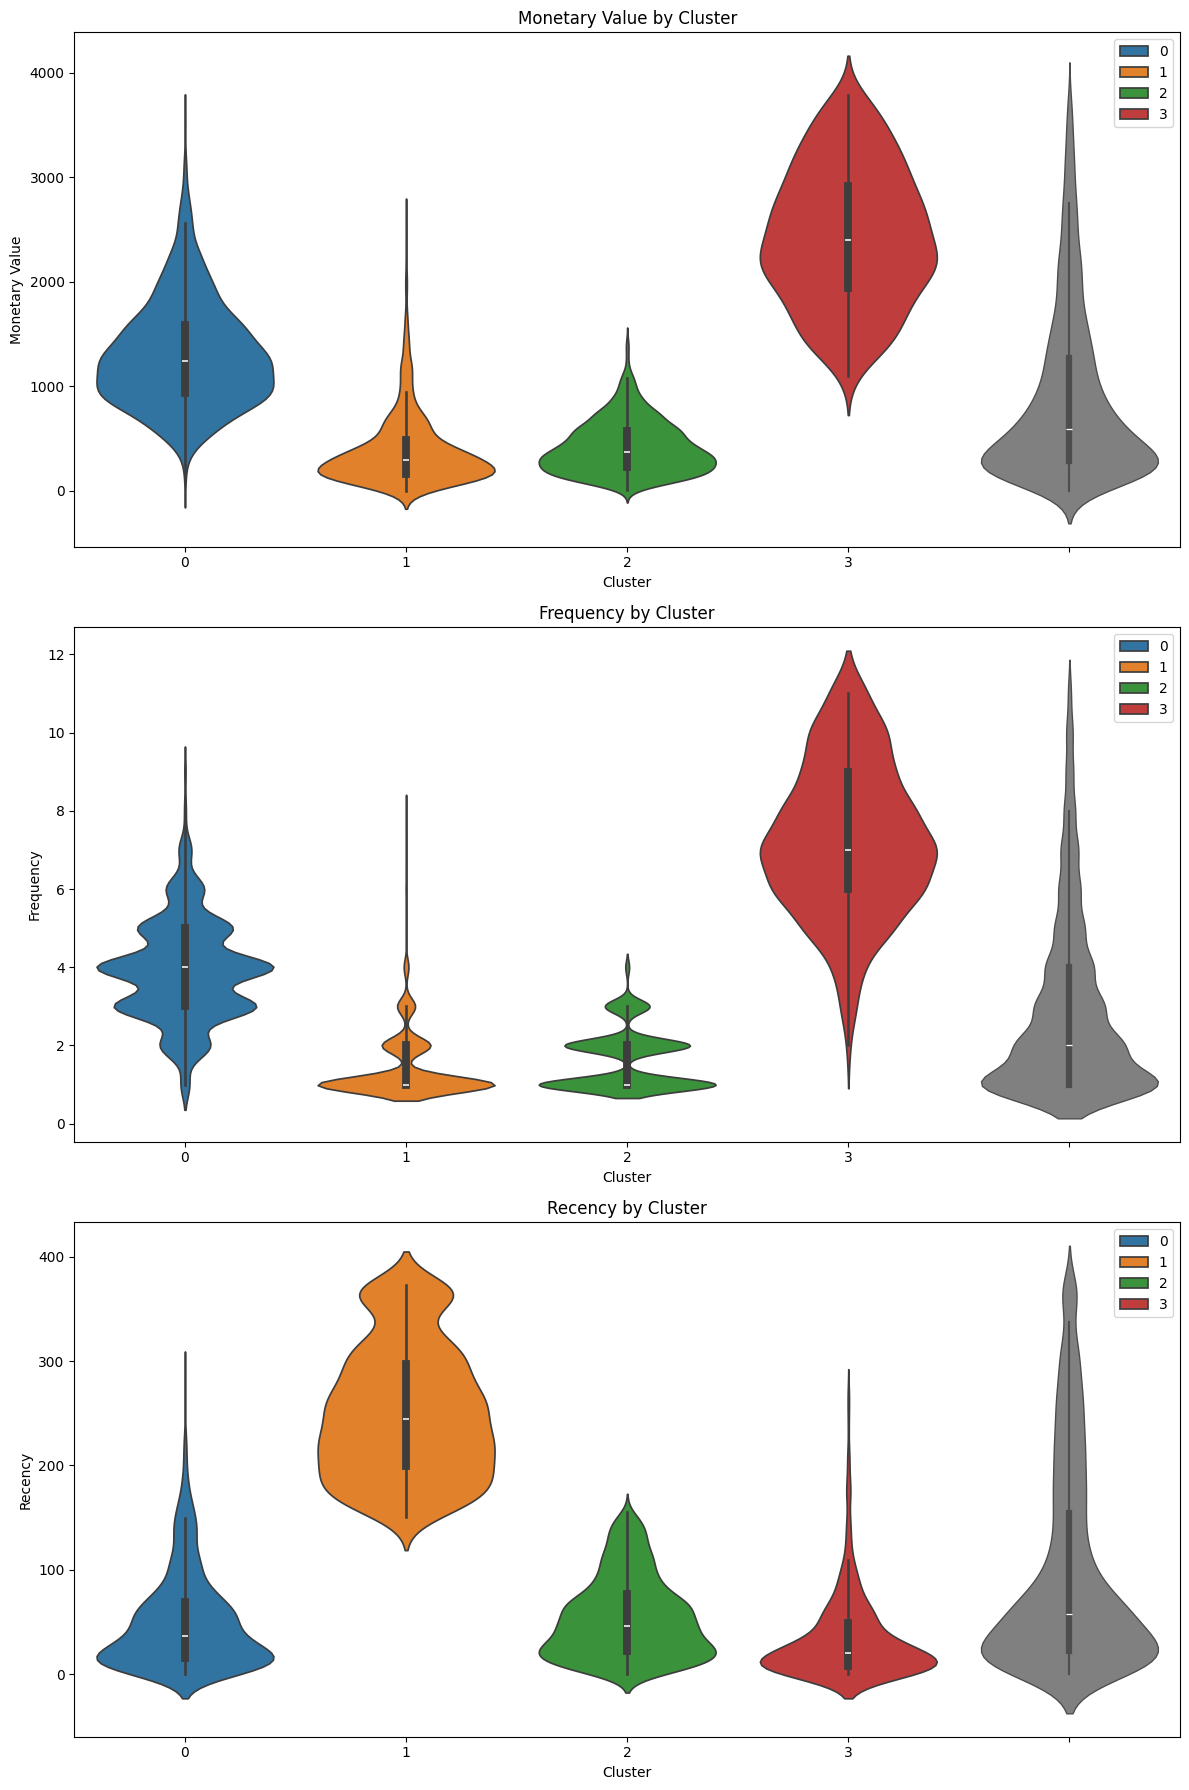

In [44]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
- Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
- Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
- Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

Summary of Cluster Names:

- Cluster 0 (Blue): "Retain"
- Cluster 1 (Orange): "Re-Engage"
- Cluster 2 (Green): "Nurture"
- Cluster 3 (Red): "Reward"

In [50]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1 
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.000,11229.990,1,2010-11-16 10:05:00,23,-1
25,12380.000,4782.840,4,2010-08-31 14:54:00,100,-1
42,12409.000,12346.620,4,2010-10-15 10:24:00,55,-1
48,12415.000,19468.840,4,2010-11-29 15:07:00,10,-1
61,12431.000,4145.520,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3


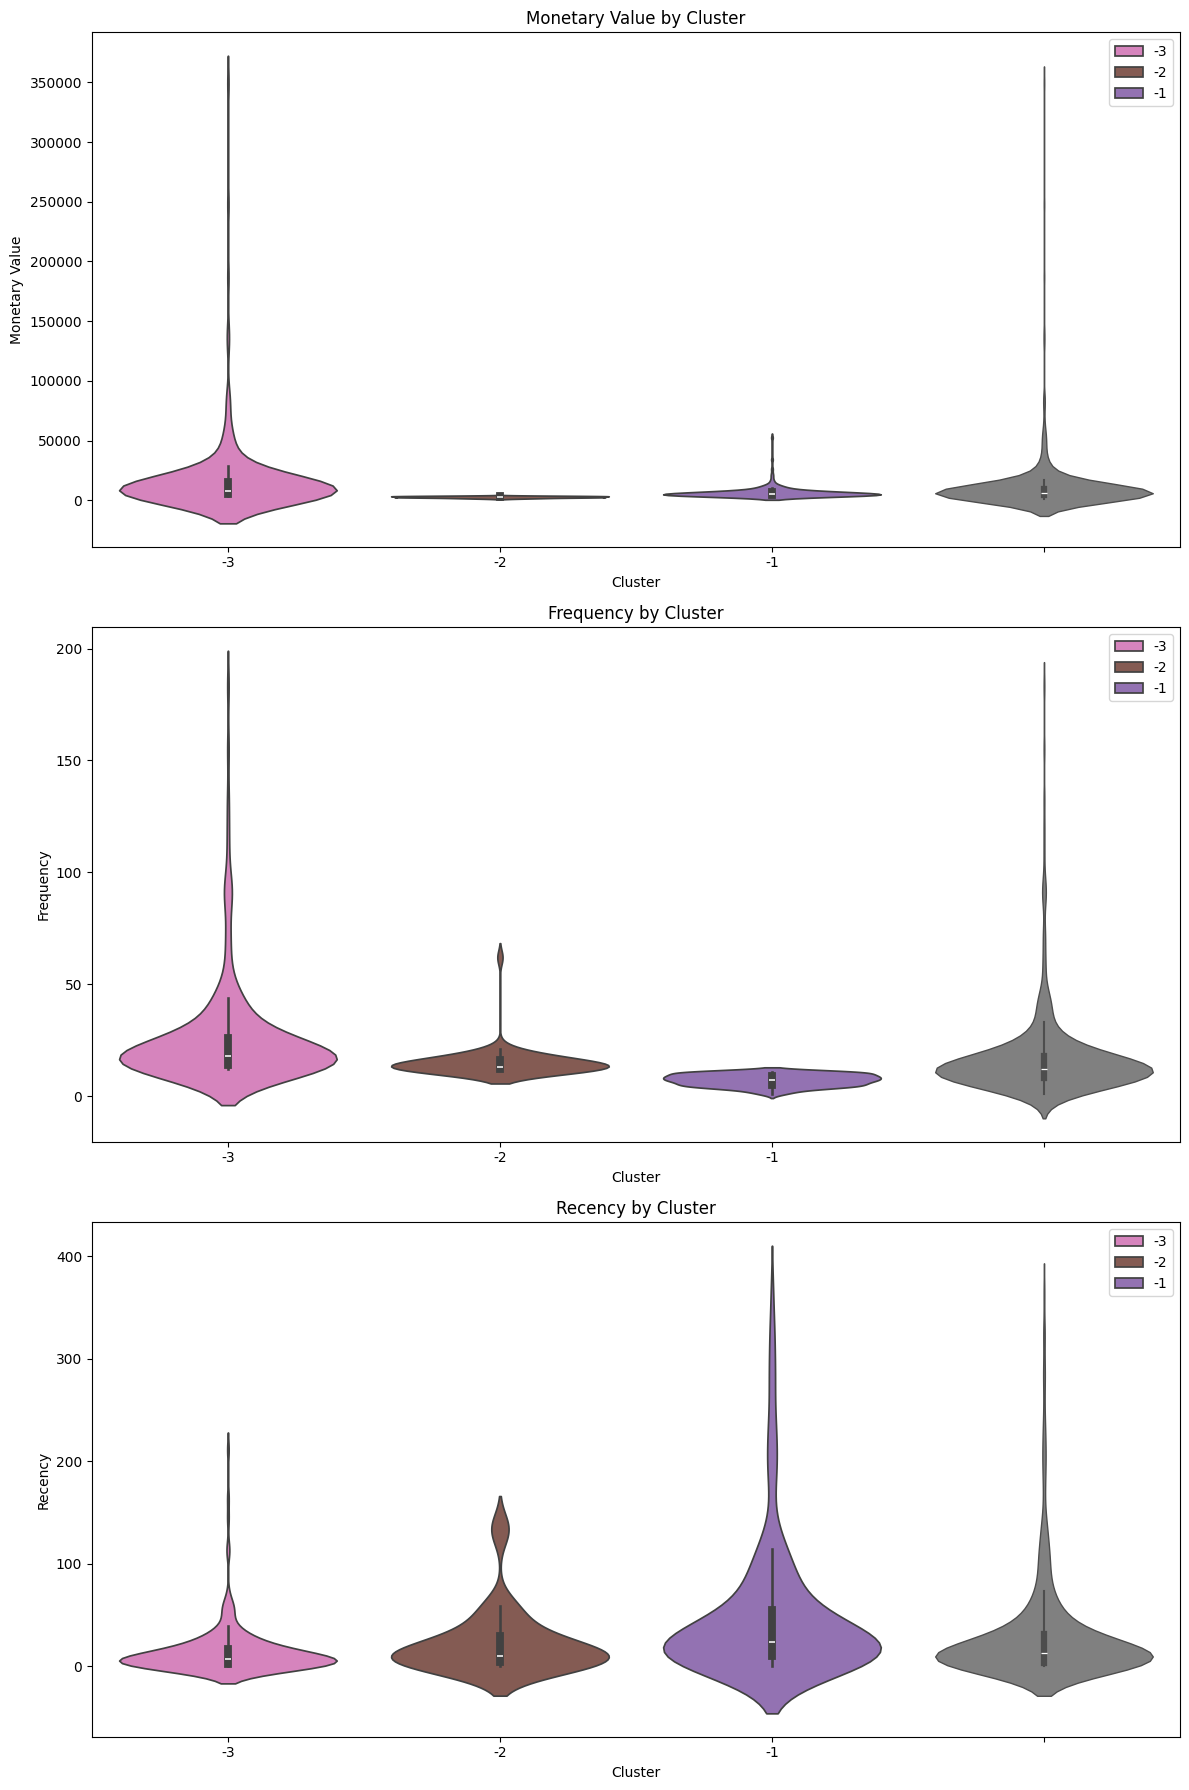

In [51]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### Cluster -1 (Monetary Outliers) PAMPER: 
- Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
- Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

#### Cluster -2 (Frequency Outliers) UPSELL: 
- Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
- Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

#### Cluster -3 (Monetary & Frequency Outliers) DELIGHT: 
- Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
- Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [52]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [53]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3


In [54]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.000,7516.310,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.000,7545.140,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.000,6650.830,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.000,4791.800,23,2010-10-29 14:17:00,41,-3,DELIGHT


### Visualization

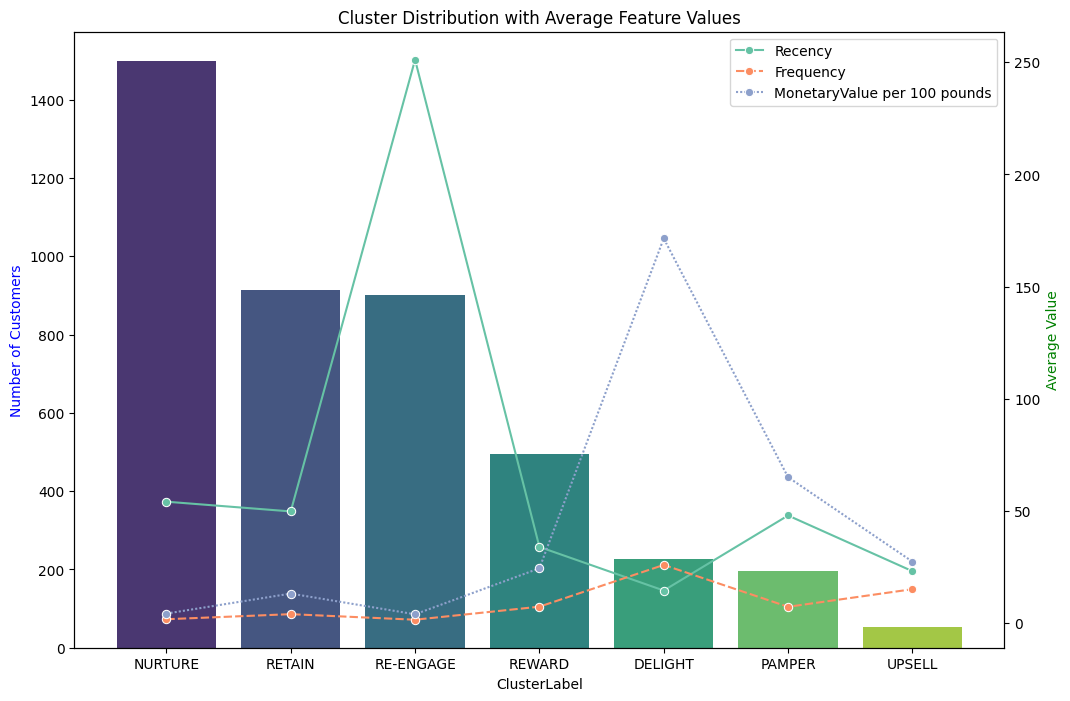

In [55]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()